In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function
from enlib import enmap
from orphics import maps, cosmology, io, stats
import numpy as np

In [2]:
# Fake geometry
resolution = 0.5
shape, wcs = maps.rect_geometry(width_deg=20.,px_res_arcmin=resolution)

In [3]:
print(shape)

(2400, 2400)


In [4]:
cc = cosmology.Cosmology(lmax=2000,pickling=True,dimensionless=False)
ells = np.arange(0,2000,1)
cltt = cc.theory.lCl('TT',ells)

Generating theory Cls...
Loaded cached Cls from  output/clsAll_2000_20171129.pkl
Loaded cached Cls from  output/clphi_2000_20171129.txt


In [5]:
ps = cltt.reshape((1,1,ells.size))
mg = maps.MapGen(shape,wcs,ps)

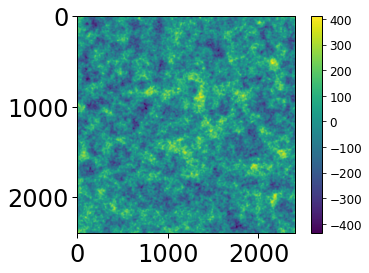

In [6]:
simulated_map = mg.get_map()
io.plot_img(simulated_map)


In [7]:
# fake catalog

bounds = simulated_map.box()
print(bounds*180./np.pi)

[[-10. -10.]
 [10. 10.]]


In [38]:
Nobj = 20000
ras = np.random.uniform(-9,9,Nobj)*np.pi/180.
decs = np.random.uniform(-9,9,Nobj)*np.pi/180.


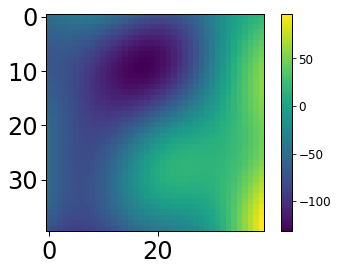

In [43]:
stamp = maps.cutout(simulated_map,ras[0],decs[0],arcmin_width=20.)
modrmap = stamp.modrmap()
io.plot_img(stamp)

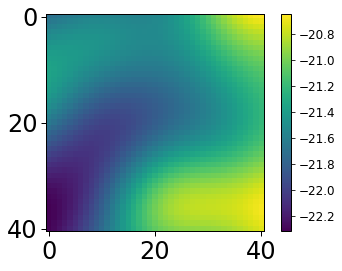

In [40]:
#aperture photometry

aperture_radius = 5.*np.pi/180./60.
annulus_width = 1. *np.pi/180./60.

# Stack

my_stacker = maps.Stacker(simulated_map,arcmin_width=20.)

stamps = 0.
fluxes = []
for k,(ra,dec) in enumerate(zip(ras,decs)):
    stamp = my_stacker.cutout(ra,dec)
    flux = maps.aperture_photometry(stamp,aperture_radius,annulus_width,modrmap=modrmap)
    fluxes.append(flux)
    stamps += stamp
stamps /= k
io.plot_img(stamps)

In [41]:
print (np.mean(fluxes),np.std(fluxes)/np.sqrt(k))

-42.9936220671 27.8859744159
